In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.dates as mdates

In [18]:
Toulouse_Google=pd.read_csv("Toulouse_Google_Web_Services.csv")
#Toulouse_Google[:3]

In [19]:
Dijon_Google=pd.read_csv("Dijon_Google_Web_Services.csv")
#Dijon_Google[:3]

In [20]:
def get_30_min(df):
    df_data = df.iloc[:, 2:]
    num_columns = len(df_data.columns)
    averages_df = pd.DataFrame()

    for i in range(0, num_columns, 2):
        combined_columns = df_data.iloc[:, i:i+2]
        combined_average = combined_columns.mean(axis=1)

        hour = i // 4
        minute = '00' if (i // 2) % 2 == 0 else '30'
        averages_df[f'{hour:02d}:{minute}'] = combined_average

    averages_df.insert(0, df.columns[1], df[df.columns[1]])
    averages_df.insert(0, df.columns[0], df[df.columns[0]])

    return averages_df

In [21]:
def extreme_outliers_handling(df):

    lower_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=5/ 100)
    
    upper_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=99/ 100)
    for column in lower_percentiles.index:
        lower_limit = lower_percentiles[column]
        upper_limit = upper_percentiles[column]
        df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
        df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

In [22]:
def boxplot_fun(df,title):
    plt.figure(figsize=(30, 10))
    df.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [23]:
Toulouse_Google=get_30_min(Toulouse_Google)
Dijon_Google=get_30_min(Dijon_Google)

In [24]:
Toulouse_Google[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,109,754.5,993.5,440.0,609.5,463.5,135.5,598.5,752.0,...,2163.0,1507.0,1260.5,2458.5,1059.5,1962.5,2250.0,1113.0,1496.0,1368.0
1,20190316,455,687.5,830.5,412.0,522.0,408.0,168.5,554.5,665.0,...,2012.5,1467.0,1276.0,2169.5,1093.0,2178.0,2285.5,1131.5,1330.0,1173.5
2,20190316,456,690.5,885.5,405.0,552.5,420.0,142.0,555.5,679.0,...,1959.0,1360.0,1146.5,2240.0,974.0,1845.5,2058.5,1034.5,1367.5,1243.0


In [25]:
Dijon_Google[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,605,111.0,101.5,99.5,66.0,45.5,32.5,26.5,63.5,...,299.5,423.0,413.0,344.5,275.0,315.0,308.5,362.5,565.0,425.0
1,20190316,630,86.0,68.0,58.0,58.5,38.5,28.5,23.0,49.5,...,190.5,227.5,211.5,236.5,183.0,213.0,222.5,201.5,265.5,731.5
2,20190316,839,119.0,108.0,122.0,71.0,49.5,34.0,28.5,60.5,...,325.5,437.0,421.0,362.0,305.0,327.5,314.0,368.0,533.5,441.5


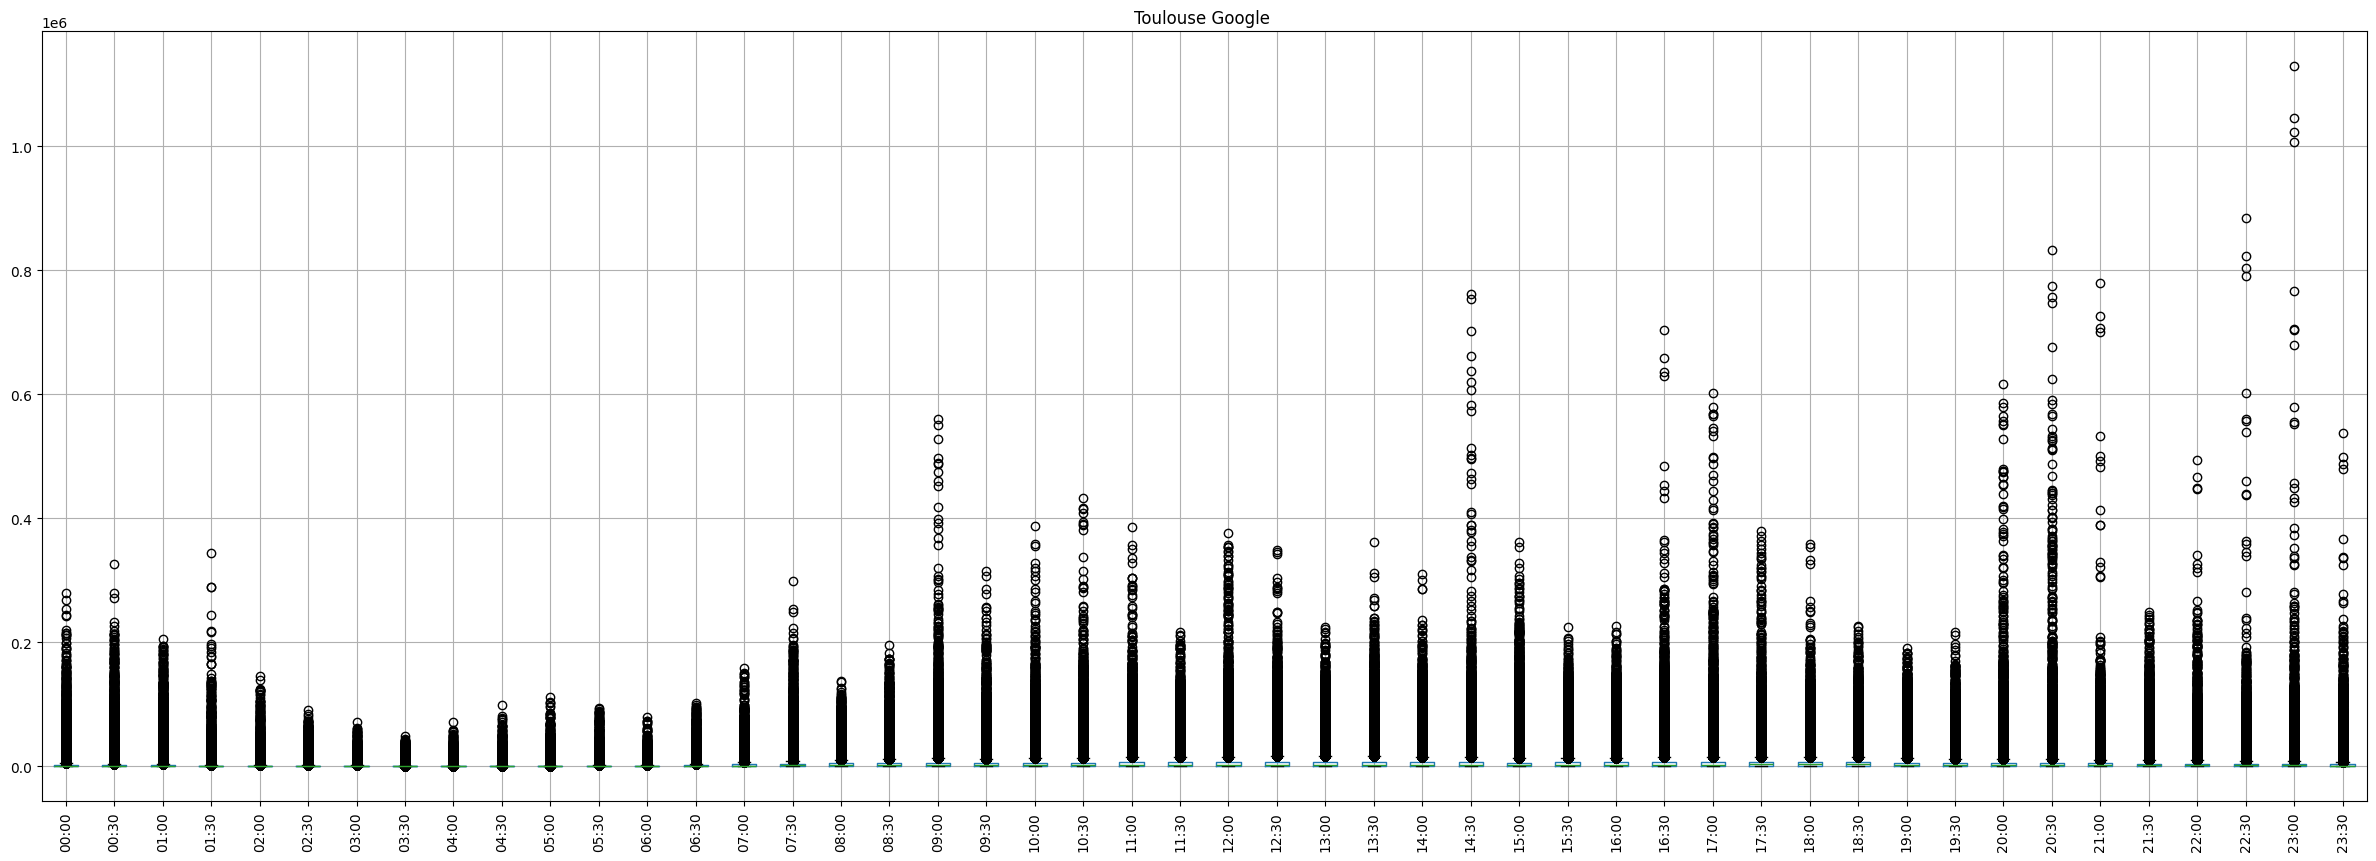

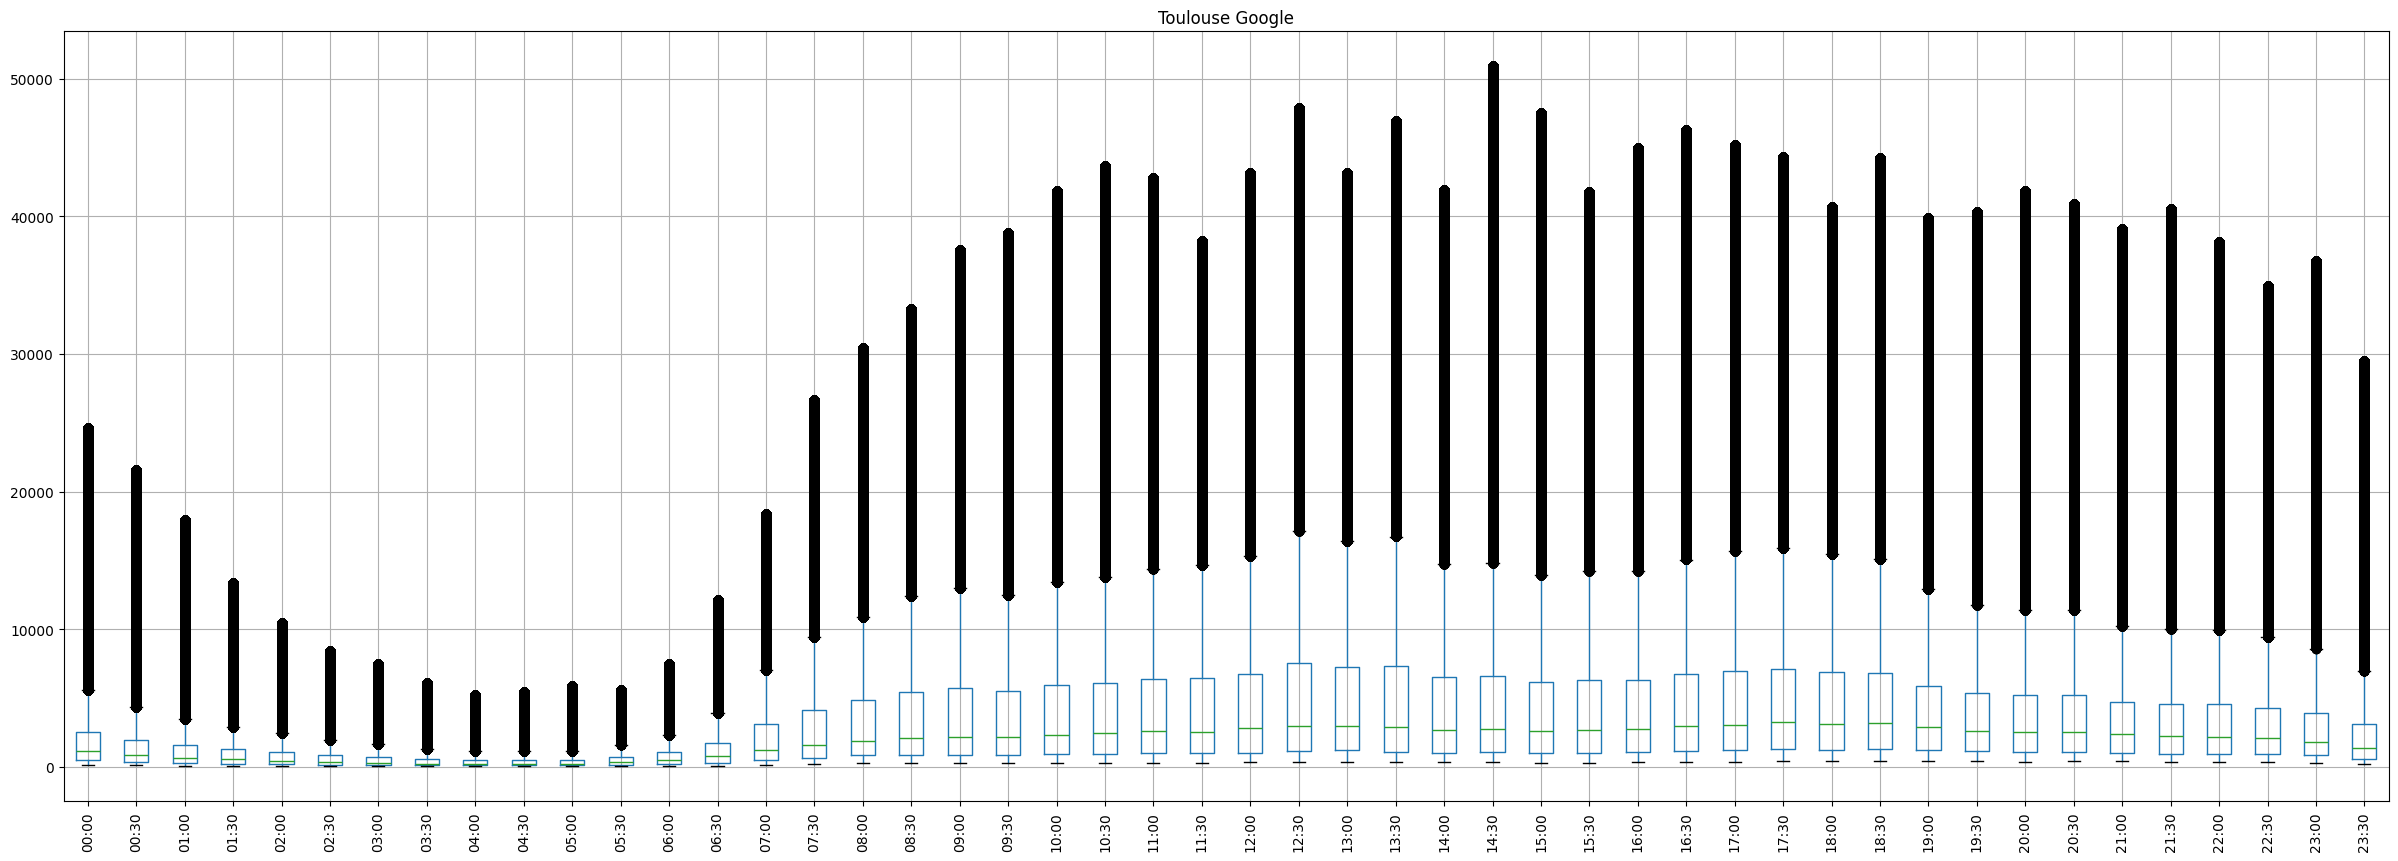

In [26]:
boxplot_fun(Toulouse_Google.iloc[:,2:],"Toulouse Google ")
Toulouse_Google=extreme_outliers_handling(Toulouse_Google)
boxplot_fun(Toulouse_Google.iloc[:,2:],"Toulouse Google")

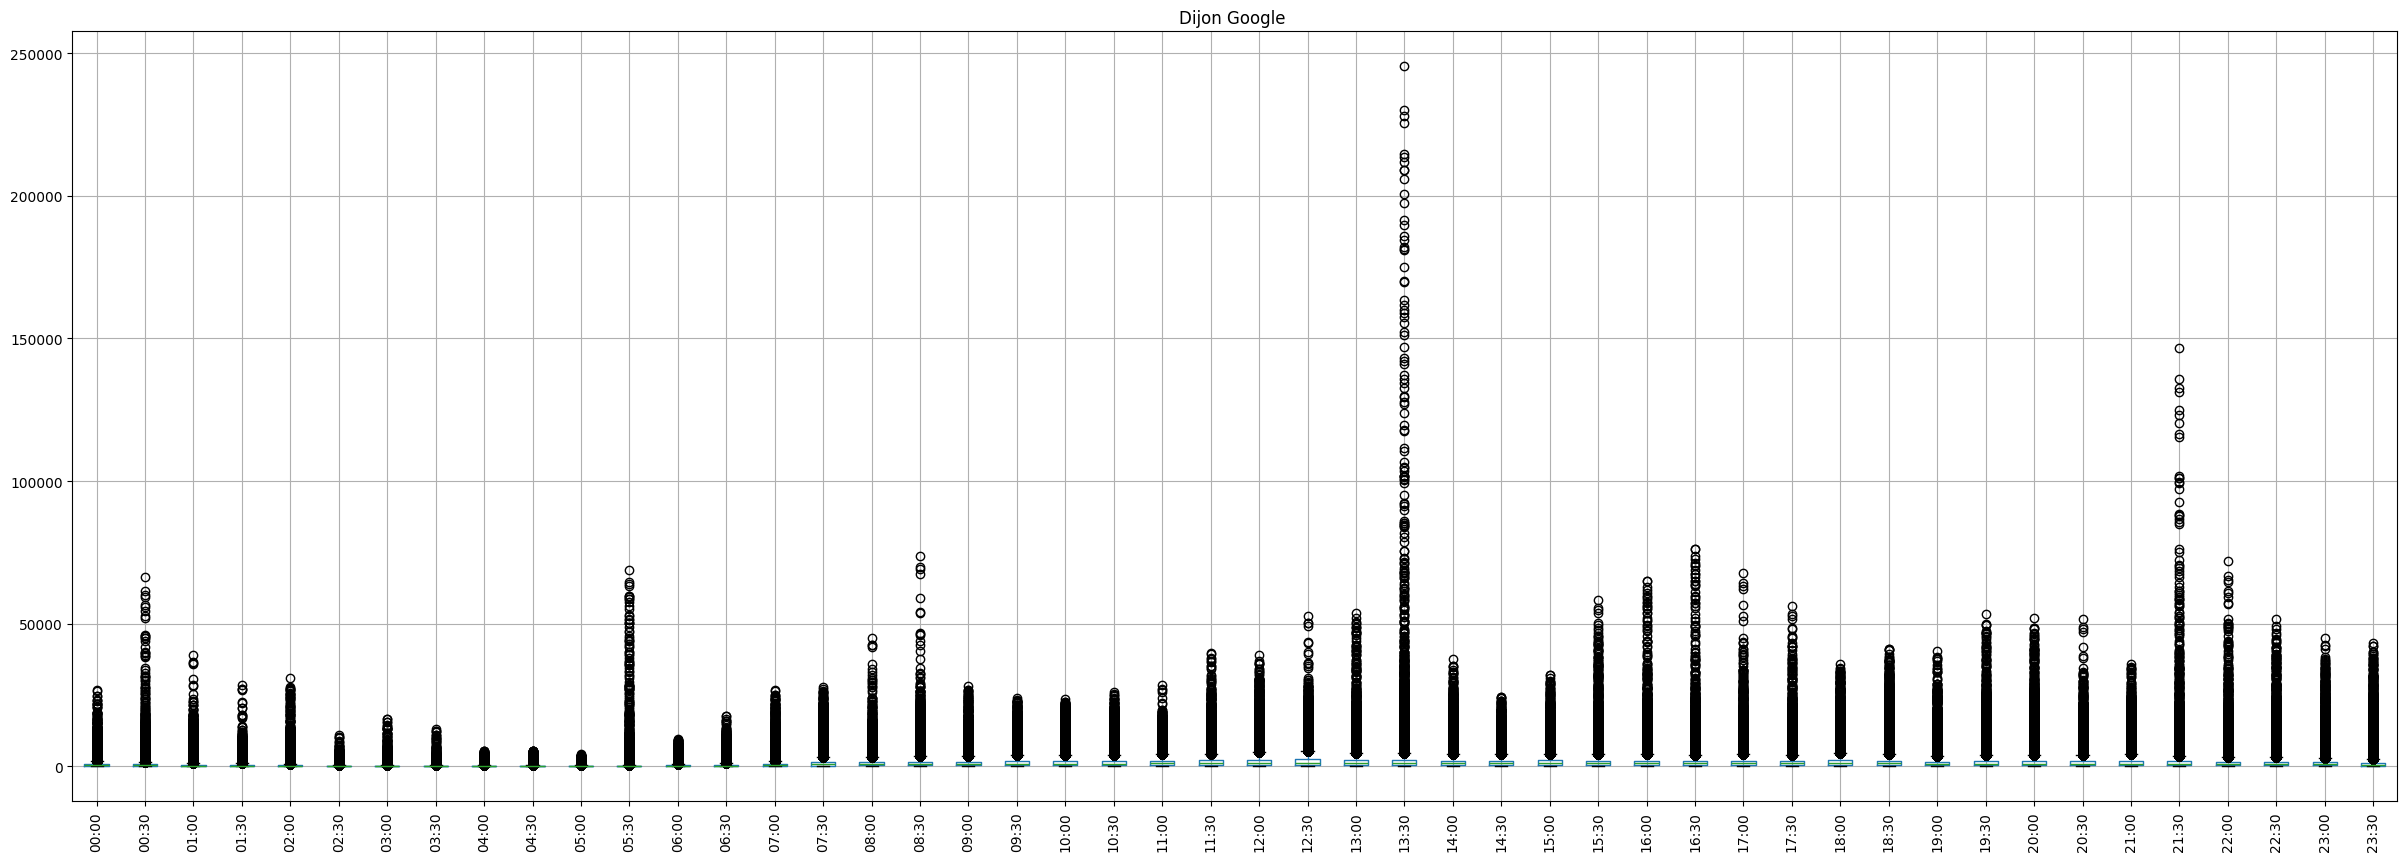

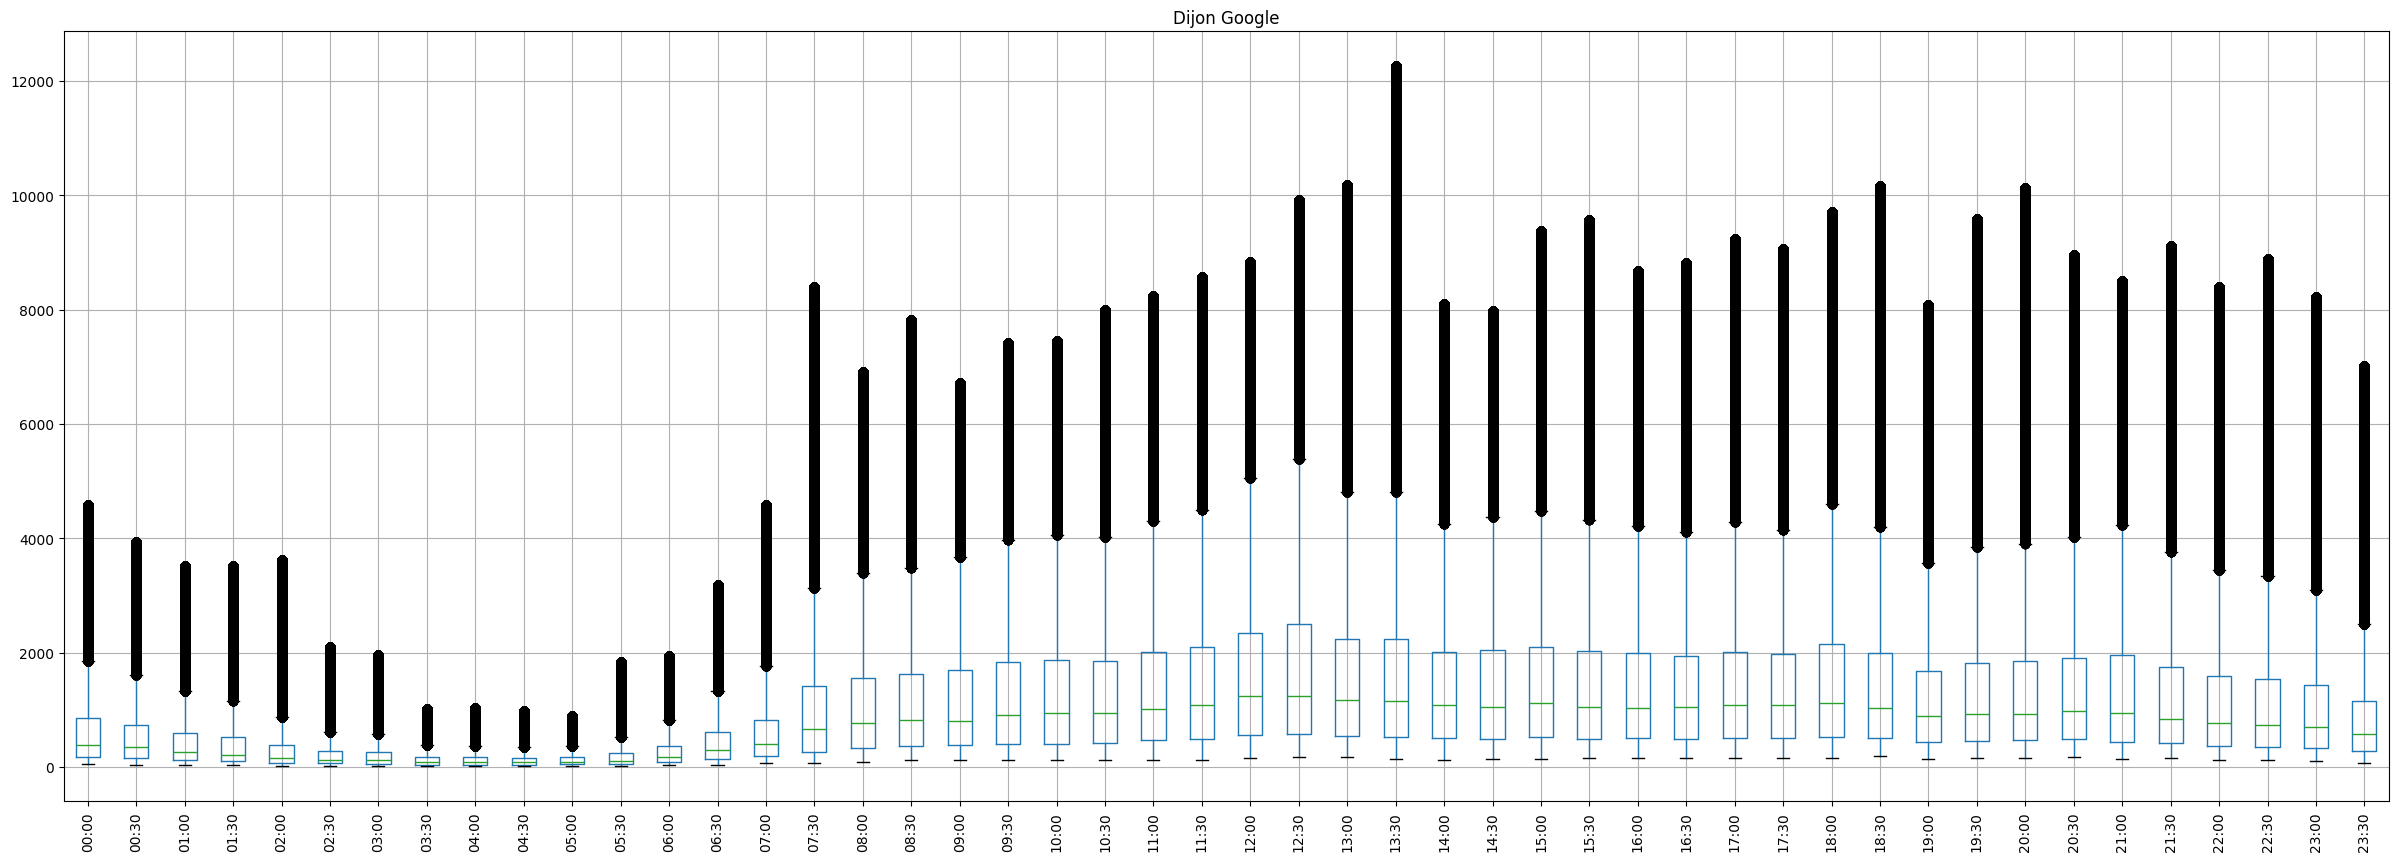

In [27]:
boxplot_fun(Dijon_Google.iloc[:,2:],"Dijon Google ")
Dijon_Google=extreme_outliers_handling(Dijon_Google)
boxplot_fun(Dijon_Google.iloc[:,2:],"Dijon Google")

In [28]:
Toulouse_Google.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

In [29]:
Dijon_Google.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

In [30]:
Toulouse_Google['Total usages'] = Toulouse_Google.iloc[:,2:].sum(axis=1) 

Dijon_Google['Total usages'] = Dijon_Google.iloc[:,2:].sum(axis=1) 
Dijon_Google[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,6217.0,111.0,101.5,99.5,66.0,45.5,32.5,26.5,63.5,...,423.0,413.0,344.5,275.0,315.0,308.5,362.5,565.0,425.0,12914.0
1,20190316.0,6217.0,86.0,68.0,58.0,58.5,38.5,28.5,23.0,49.5,...,227.5,211.5,236.5,183.0,213.0,222.5,201.5,265.5,731.5,9748.5


In [31]:
Toulouse_Google[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,754.5,993.5,440.0,609.5,463.5,135.5,598.5,752.0,...,1507.0,1260.5,2458.5,1059.5,1962.5,2250.0,1113.0,1496.0,1368.0,65970.5
1,20190316.0,12757.0,687.5,830.5,412.0,522.0,408.0,168.5,554.5,665.0,...,1467.0,1276.0,2169.5,1093.0,2178.0,2285.5,1131.5,1330.0,1173.5,64440.0


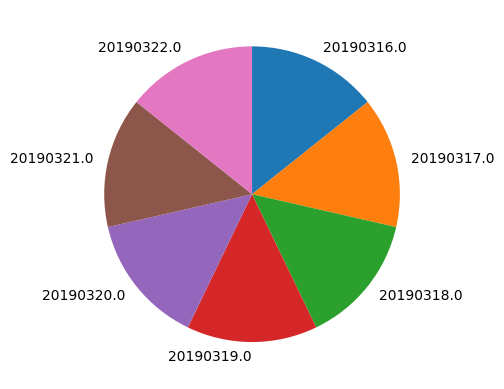

In [32]:
sorted_counts = Toulouse_Google['Date'].value_counts()
gen_percentage = sorted_counts/sorted_counts.sum()
plt.pie(gen_percentage, labels = sorted_counts.index, startangle = 90, counterclock = False);

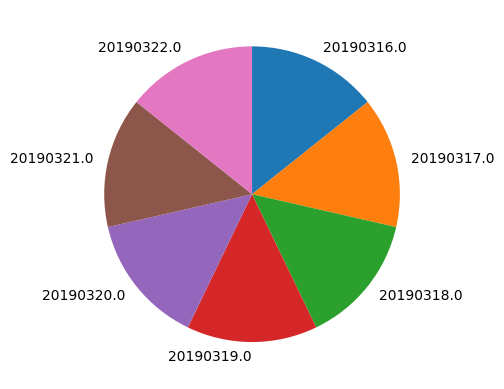

In [33]:
sorted_counts = Dijon_Google['Date'].value_counts()
gen_percentage = sorted_counts/sorted_counts.sum()
plt.pie(gen_percentage, labels = sorted_counts.index, startangle = 90, counterclock = False);

In [34]:
def randomforestregression(df):
    
    rf = RandomForestRegressor(n_estimators=100, random_state=2454)
    x = df.iloc[:, 0:2]
    y = df['Total usages']
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    rf.fit(xtrain, ytrain)
    pred = rf.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

    plt.figure(figsize=(14, 7))
    plt.scatter(ytest, pred, alpha=0.6, color='purple')
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')
    plt.xlabel('Actual Total Usages')
    plt.ylabel('Predicted Total Usages')
    plt.title('Actual vs Predicted Total Usages')
    plt.grid(True)
    plt.show()

    errors = ytest - pred
    error_df = pd.DataFrame({'Date': xtest['Date'], 'Error': errors})
    pivot_table = error_df.pivot_table(index='Date', columns=None, values='Error', aggfunc='mean')

    plt.figure(figsize=(14, 7))
    sns.heatmap(pivot_table, cmap='magma', annot=True)
    plt.title('Heatmap of Prediction Errors')
    plt.show()

Mean Squared Error: 1108565557.9490676
Mean Absolute Error: 16967.83832415082
R2 Score: 0.976574255192098


C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


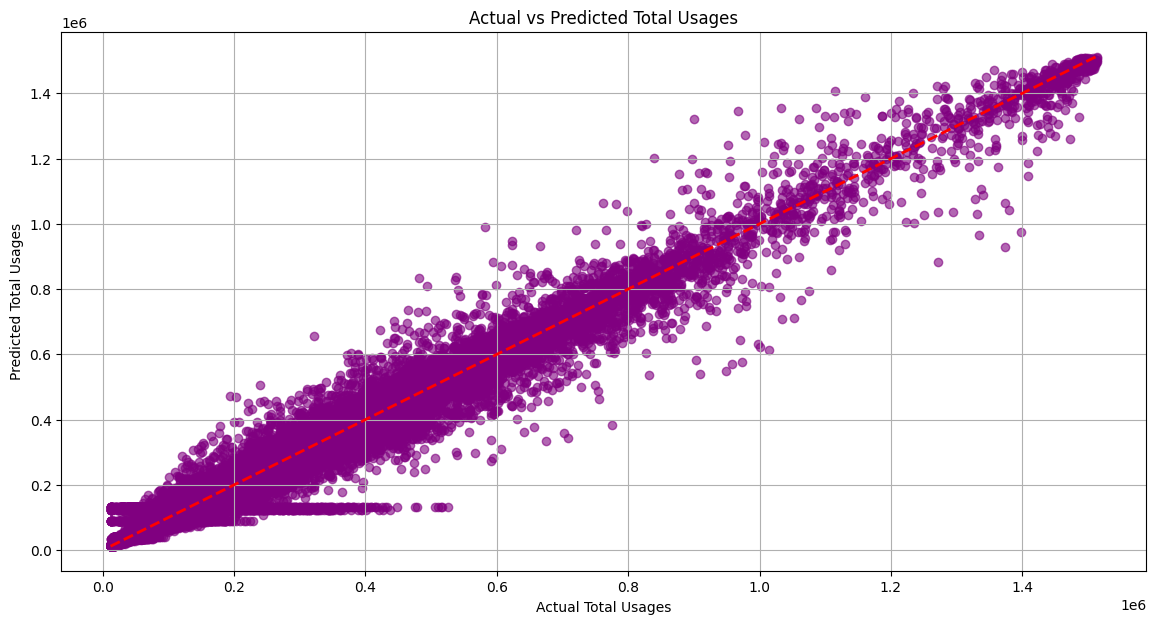

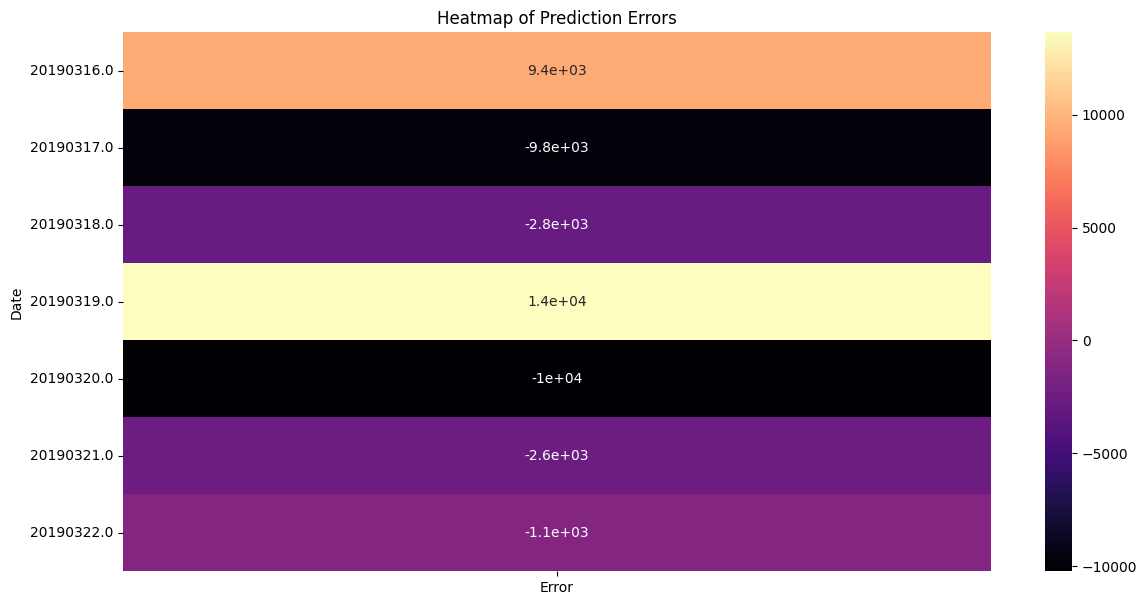

In [35]:
randomforestregression(Toulouse_Google)

Mean Squared Error: 48604612.920109525
Mean Absolute Error: 4343.288855198403
R2 Score: 0.9823021768547334


C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


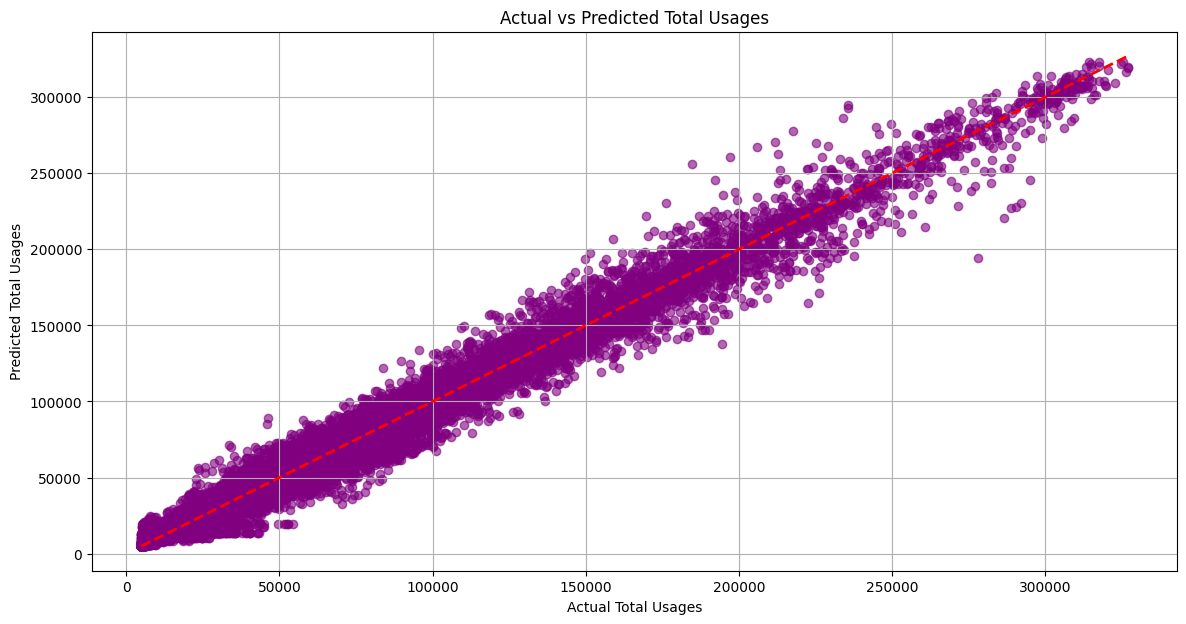

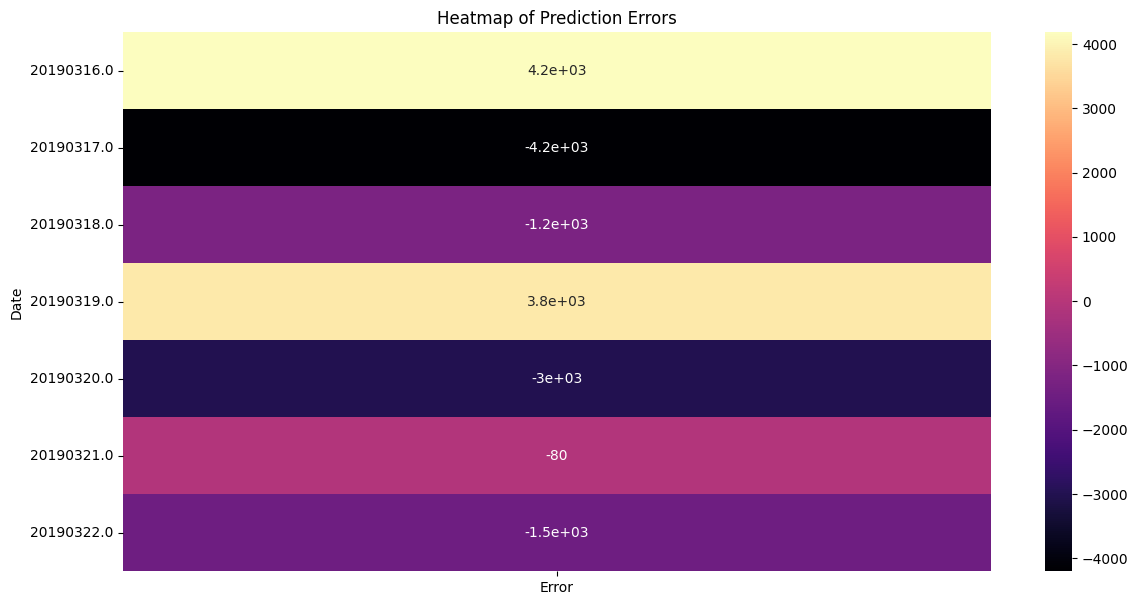

In [36]:
randomforestregression(Dijon_Google)

In [37]:
def elbowmeathod(x,city):
    inertia = [] 
    mapping = {} 
    for k in range(1,10): 

        kmeanModel = KMeans(n_clusters=k).fit(x) 
        inertia.append(kmeanModel.inertia_) 
        mapping[k] = kmeanModel.inertia_ 
    plt.plot(range(1,10), inertia, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method of '+city) 
    plt.show() 


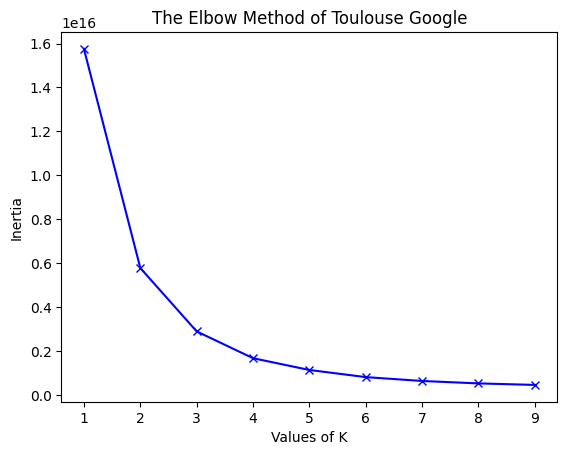

In [38]:
elbowmeathod(Toulouse_Google,"Toulouse Google")

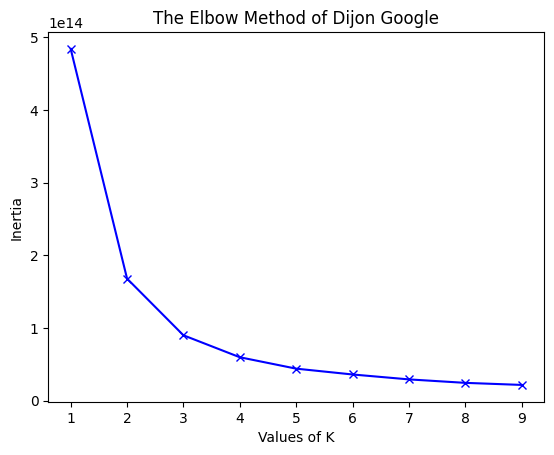

In [39]:
elbowmeathod(Dijon_Google,"Dijon Google")

In [40]:
def kmeans(n,df):
    kmeans = KMeans(n_clusters=n, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df)
    melted_df = df.melt(id_vars=['Date', 'tile_id', 'Cluster','Total usages'], var_name='Time', value_name='Usage')
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10')
    plt.title('Data Usage Clusters Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10', s=50)
    plt.title('Cluster Visualization Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()


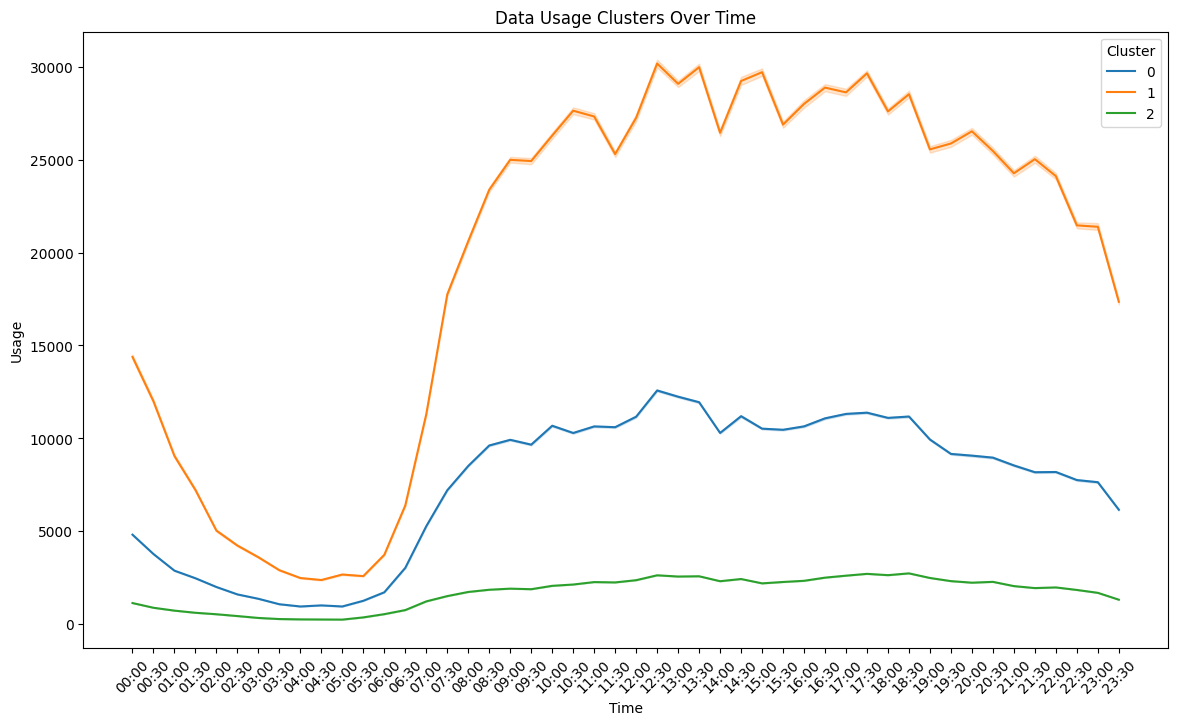

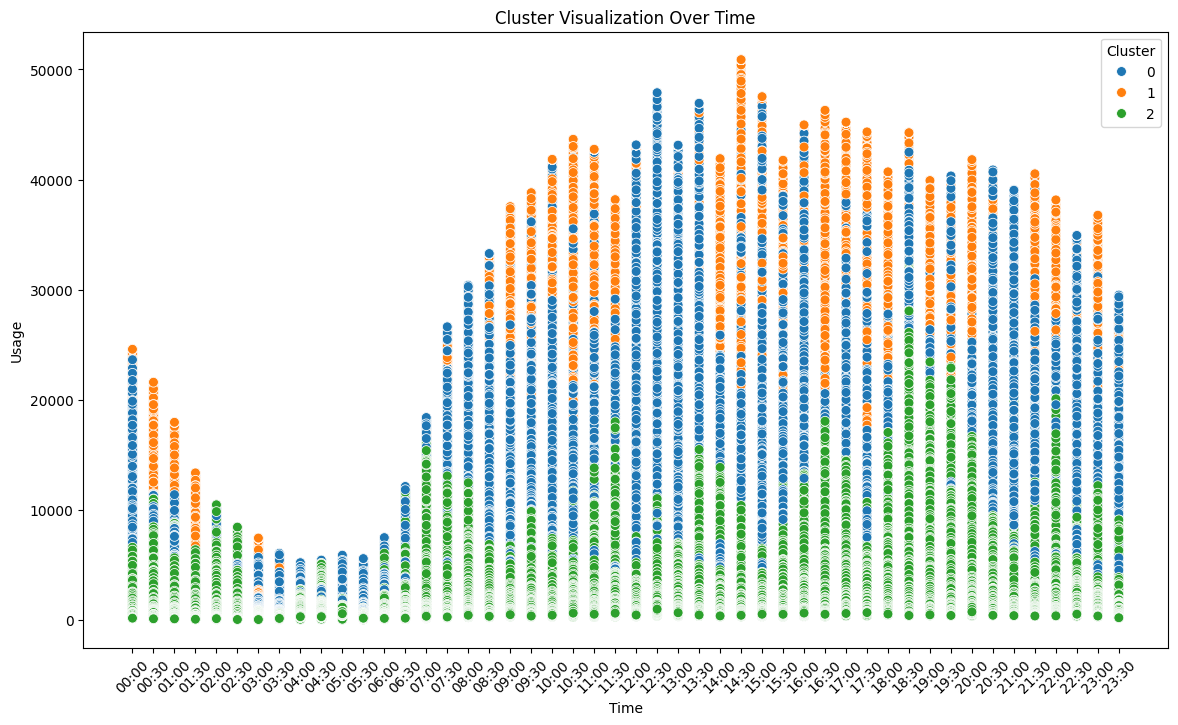

In [41]:
kmeans(3,Toulouse_Google)

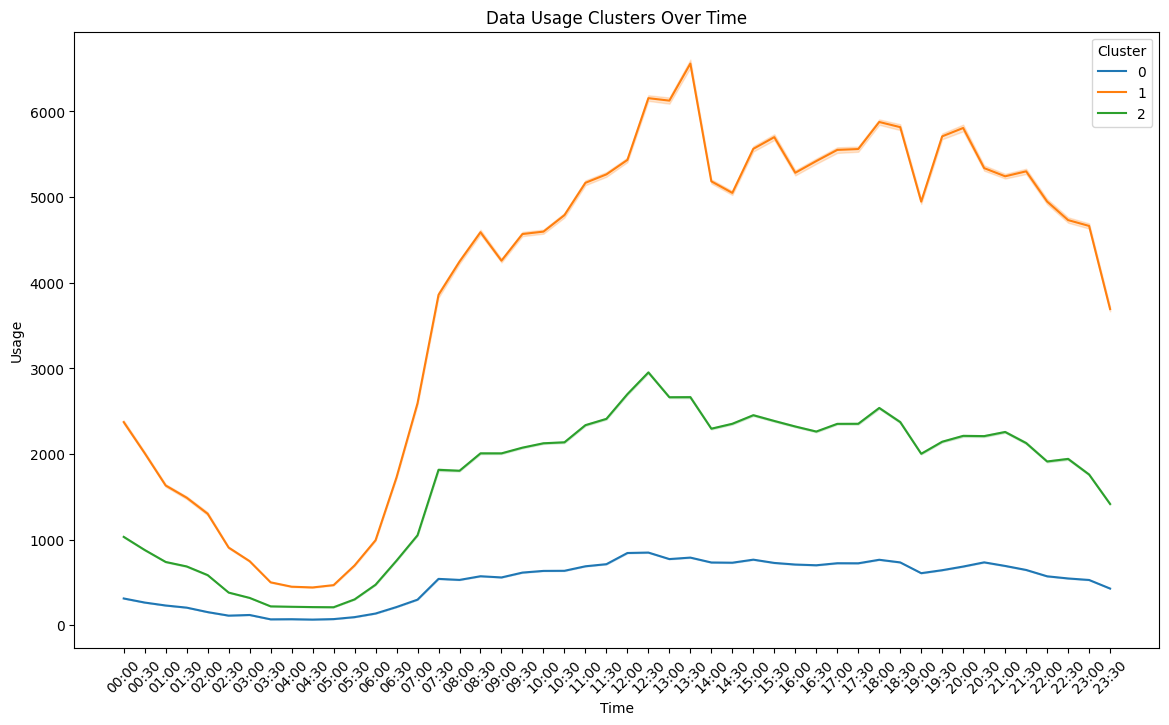

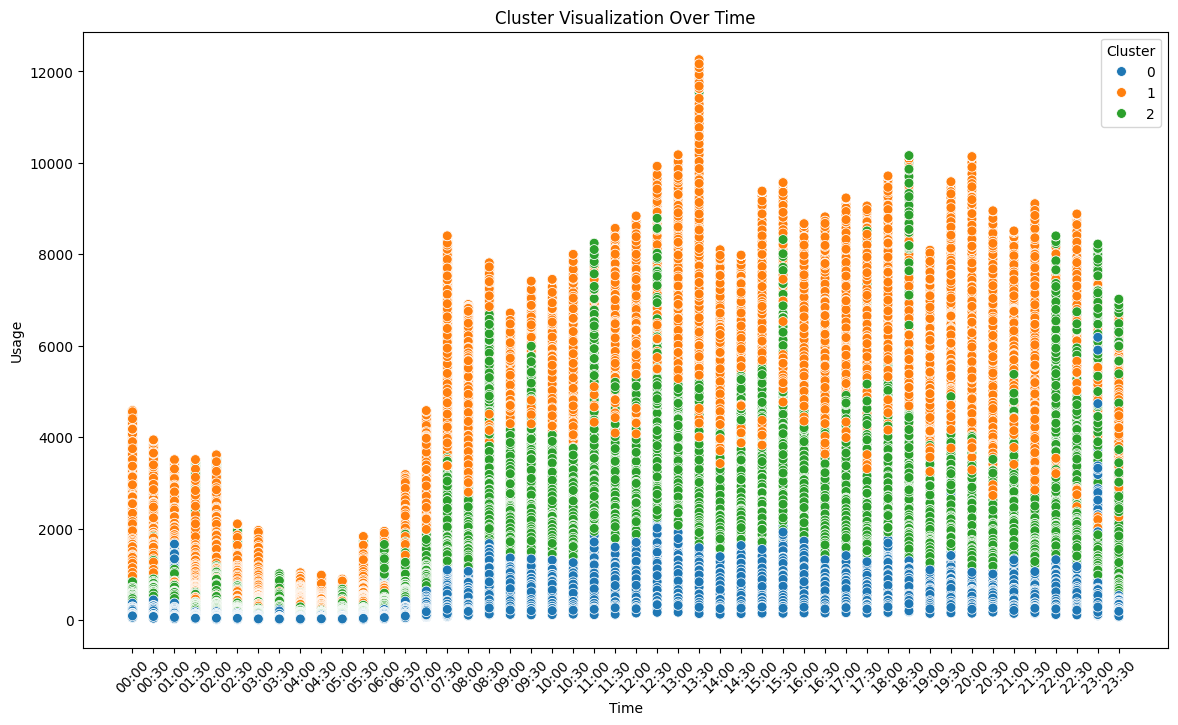

In [42]:
kmeans(3,Dijon_Google)

In [43]:
Toulouse_Google['Date'] = pd.to_datetime(Toulouse_Google['Date'], format='%Y%m%d')
Dijon_Google['Date'] = pd.to_datetime(Dijon_Google['Date'], format='%Y%m%d')

In [44]:
df1=Toulouse_Google[Toulouse_Google['Cluster']==0]
df2=Toulouse_Google[Toulouse_Google['Cluster']==1]
df3=Toulouse_Google[Toulouse_Google['Cluster']==2]
df4=Toulouse_Google[Toulouse_Google['Cluster']==3]


In [45]:
df11=Dijon_Google[Dijon_Google['Cluster']==0]
df22=Dijon_Google[Dijon_Google['Cluster']==1]
df33=Dijon_Google[Dijon_Google['Cluster']==2]

C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\613776758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\613776758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\613776758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

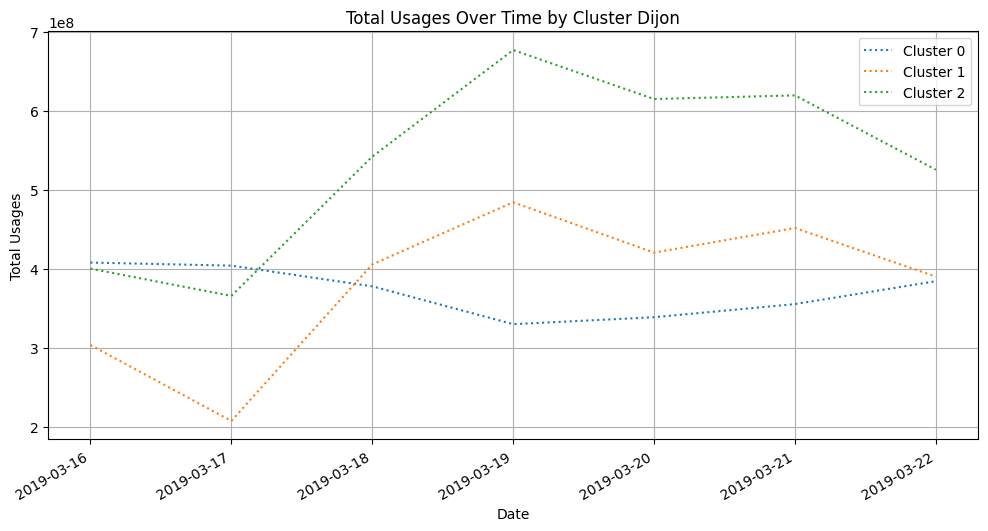

In [46]:
df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
df33['Date'] = pd.to_datetime(df33['Date'], format='%Y%m%d')
df11 = df11.groupby('Date')['Total usages'].sum().reset_index()
df22 = df22.groupby('Date')['Total usages'].sum().reset_index()
df33 = df33.groupby('Date')['Total usages'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df11['Date'], df11['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df22['Date'], df22['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df33['Date'], df33['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')


plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Dijon')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate() 

plt.show()

C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\135091174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\135091174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
C:\Users\Nour Al-Din\AppData\Local\Temp\ipykernel_16784\135091174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

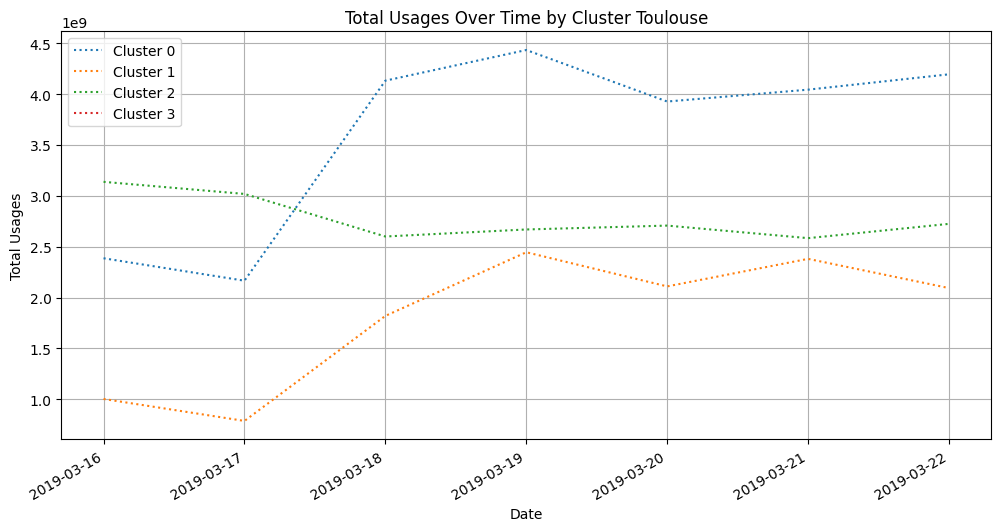

In [47]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y%m%d')
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y%m%d')
df1 = df1.groupby('Date')['Total usages'].sum().reset_index()
df2 = df2.groupby('Date')['Total usages'].sum().reset_index()
df3 = df3.groupby('Date')['Total usages'].sum().reset_index()
df4 = df4.groupby('Date')['Total usages'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df2['Date'], df2['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df3['Date'], df3['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')
plt.plot(df4['Date'], df4['Total usages'], label='Cluster 3', color='tab:red', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Toulouse')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate() 

plt.show()

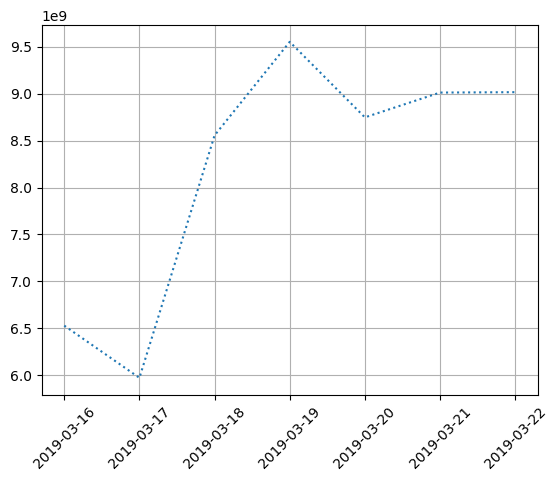

In [48]:
def datetimeplot(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    daily_usages = df.groupby('Date')['Total usages'].sum().reset_index()
    plt.plot(daily_usages['Date'],daily_usages['Total usages'], linestyle = 'dotted')
    plt.xticks(rotation=45)
    plt.grid(True)
datetimeplot(Toulouse_Google)

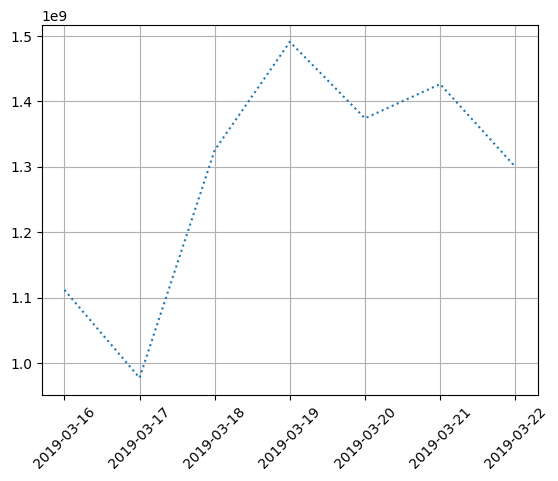

In [49]:
datetimeplot(Dijon_Google)

In [50]:
def KNN(df):
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    df['Total usages'] =df.iloc[:,2:].sum(axis=1) 
    lr = KNeighborsRegressor()
    x = df.iloc[:, 2:12]
    y = df.iloc[:, 12:-1]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    

    lr.fit(xtrain, ytrain)
    pred = lr.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    y_test_flat = np.array(ytest).flatten()
    pred_flat = np.array(pred).flatten()
    results_df = pd.DataFrame({ 'Actual': y_test_flat, 'Predicted': pred_flat})

    plt.figure(figsize=(18, 6))
    sns.lineplot(x='Actual', y='Predicted', data=results_df)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values with Regression Line')
    plt.show()

Mean Squared Error: 132073376.01028828
Mean Absolute Error: 1137.0148145412443
R2 Score: 0.9473385139699033


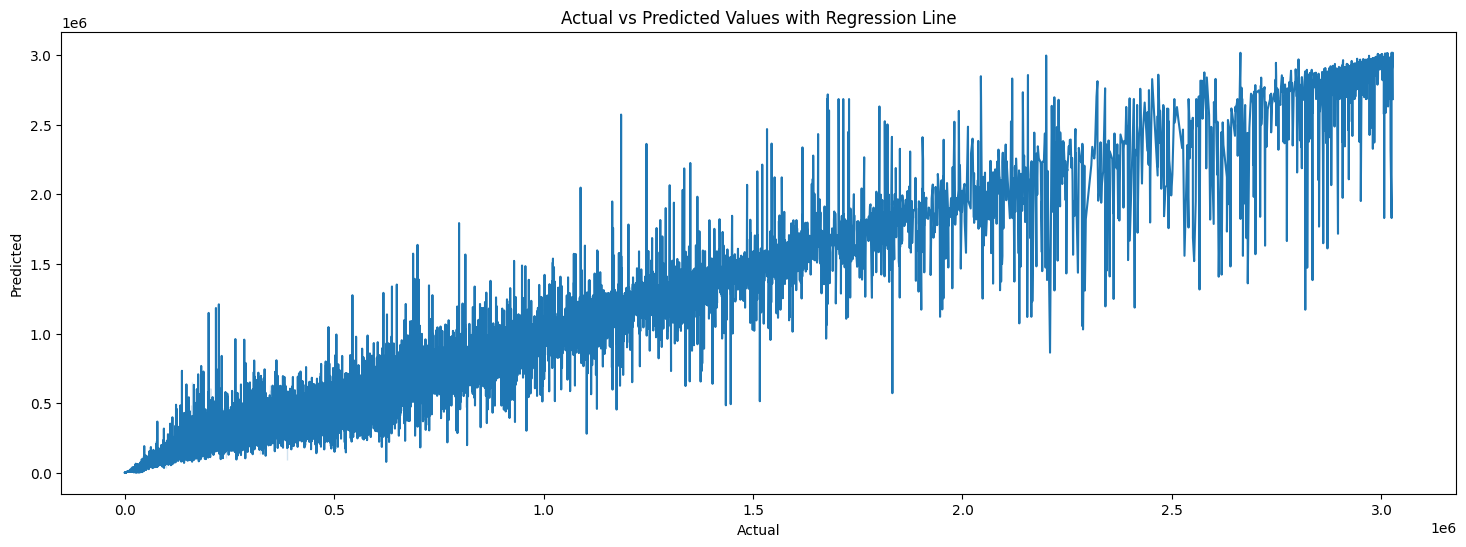

In [51]:
KNN(Toulouse_Google)

Mean Squared Error: 4602635.6790901525
Mean Absolute Error: 268.466891989065
R2 Score: 0.966392078066452


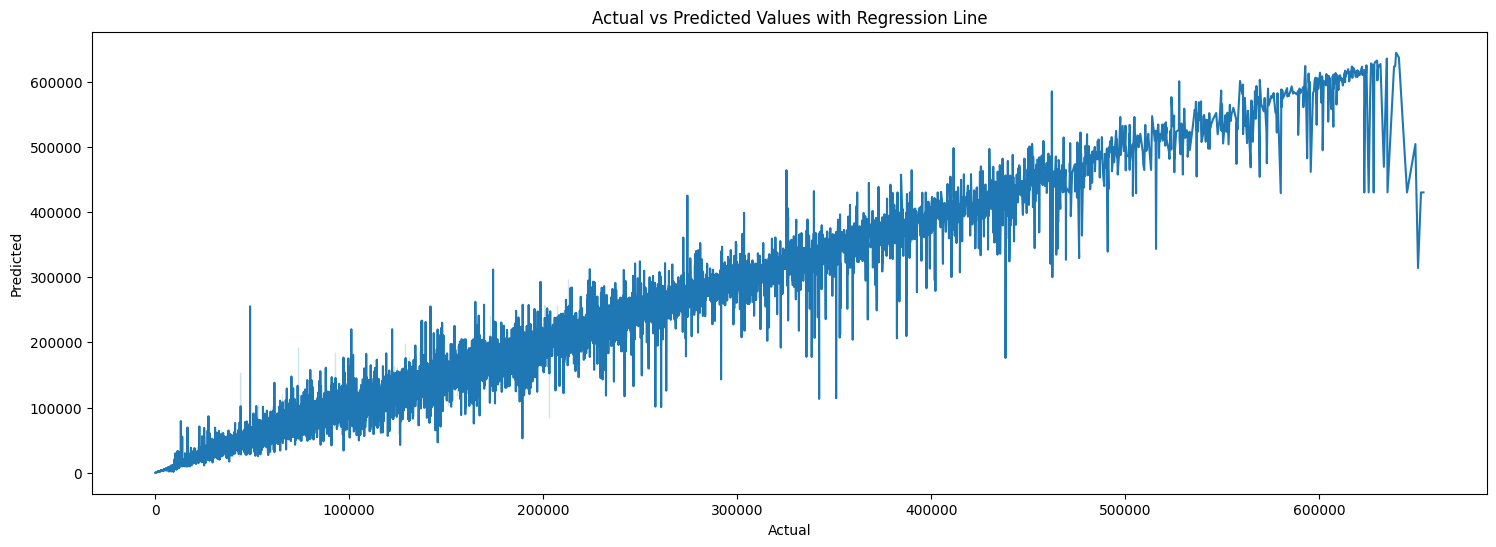

In [52]:
KNN(Dijon_Google)